
# <p><center style="font-family:newtimeroman;font-size:180%;">Elpv Classification and Quality Evaluation Using Image Analysis </center></p>
### Table of contents:
* [Introduction](#11)
* [Import Libraries](#1)
* [Read Data](#2)
* [Visualization Of Dataset](#3)
* [Split Data into Train and Test](#10)
* [Data Augmentation](#4)
* [Train CNN Model](#5)
* [Evaluate The Model](#6)

**<a id="11"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Introduction </p>
<a class="btn" href="#home">Tabel of Contents</a>

The dataset contains 2,624 samples of 300* 300 pixels 8-bit grayscale images of functional and defective solar cells with varying degree of degradations extracted from 44 different solar modules. The defects in the annotated images are either of intrinsic or extrinsic type and are known to reduce the power efficiency of solar modules.
All images are normalized with respect to size and perspective. Additionally, any distortion induced by the camera lens used to capture the EL images was eliminated prior to solar cell extraction.

**<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Import Libraries </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [1]:
import os 
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm

**<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Read Data </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [2]:
def data(dataset_path):
    images = []
    labels = []
    lab=pd.read_csv('labels.csv',names=['label'])['label']
    i=0
    for image_filename in tqdm(os.listdir(dataset_path)):
        image_path = os.path.join(dataset_path, image_filename)
        images.append(image_path)
        name=lab[i].split()
        labels.append(name[-1])
        i+=1
    df = pd.DataFrame({'image': images, 'label': labels})
    return df

In [3]:
#train
train=data('images')
train.head()

100%|██████████| 2624/2624 [00:00<00:00, 82105.05it/s]


image label
0  images\cell0001.png  mono
1  images\cell0002.png  mono
2  images\cell0003.png  mono
3  images\cell0004.png  mono
4  images\cell0005.png  mono

**<a id="3"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Visualization of Dataset </p>
<a class="btn" href="#home">Tabel of Contents</a>

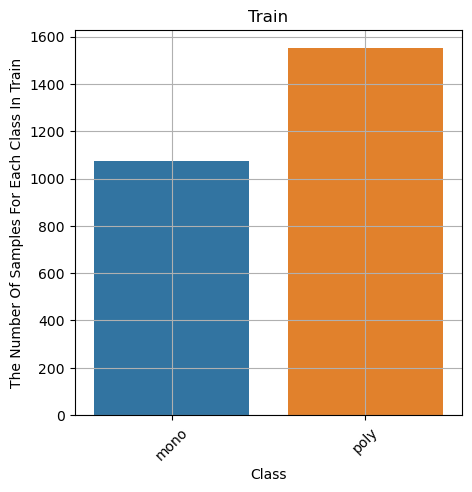

In [4]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x=train.label)
ax.set_xlabel("Class")
ax.set_ylabel("The Number Of Samples For Each Class In Train")
plt.title('Train')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

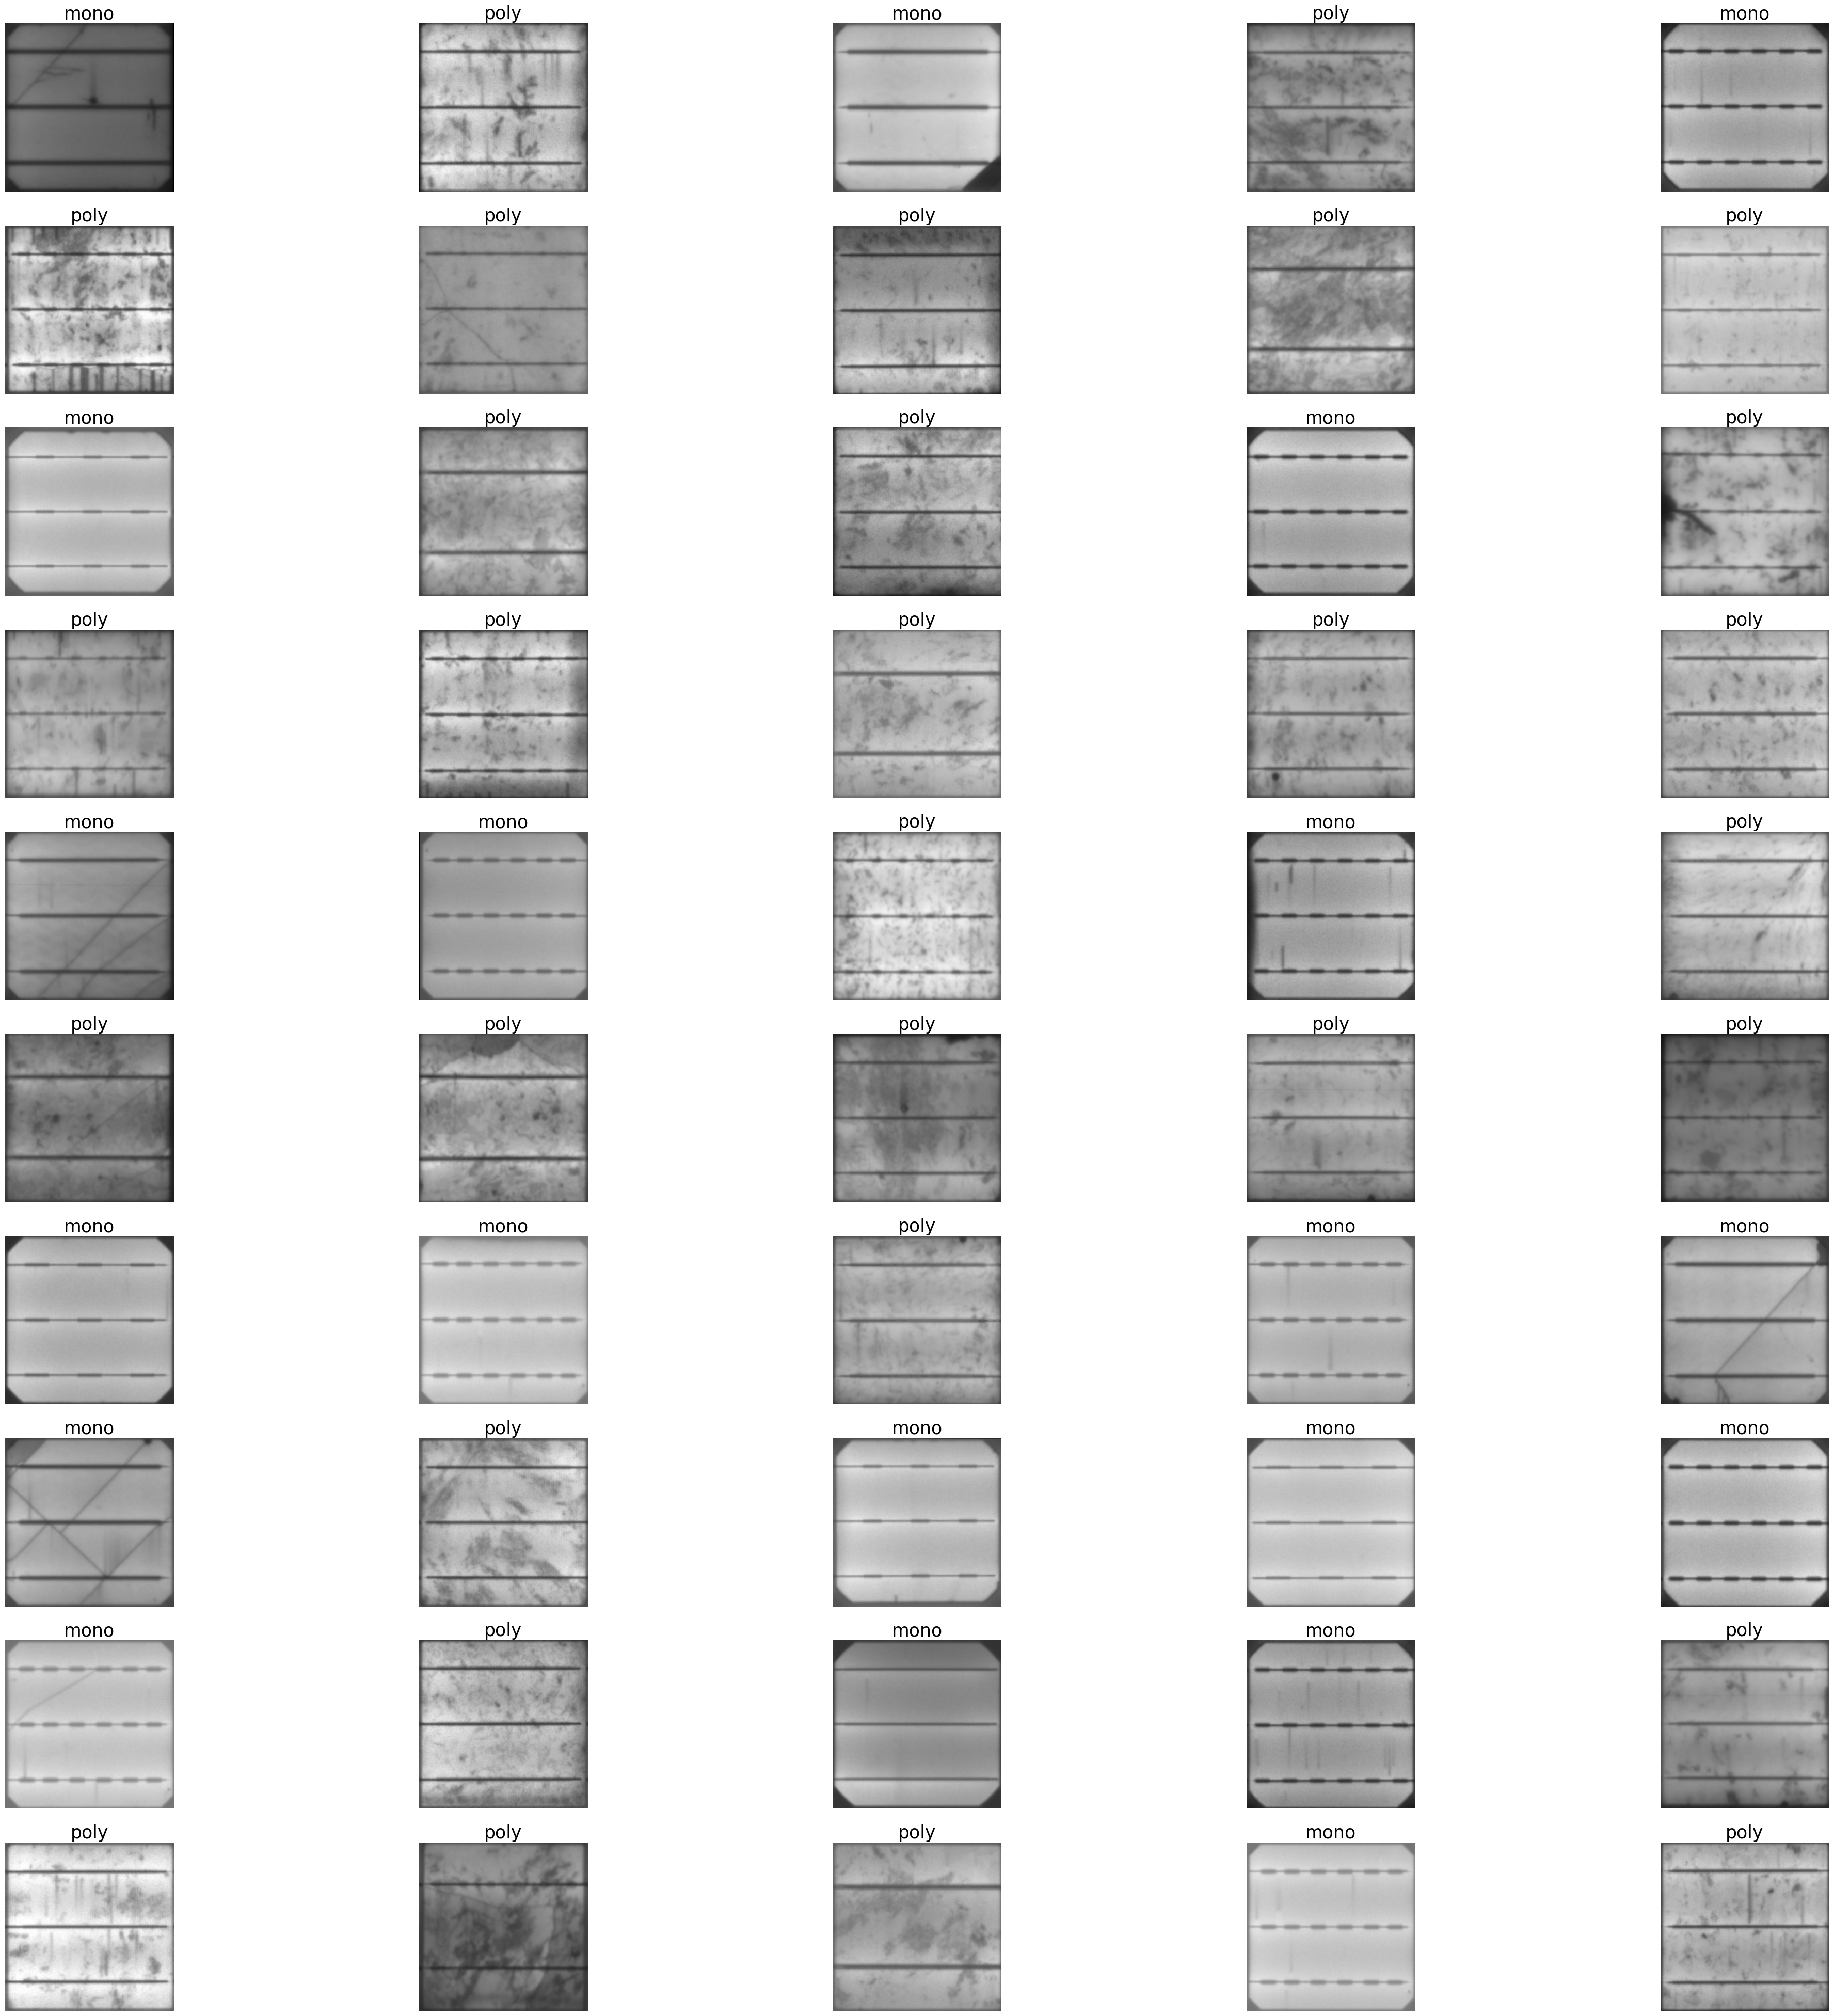

In [5]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(train),50)):
    plt.subplot(10,5,n+1)
    img=cv2.imread(train.image[i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(train.label[i],fontsize=25)

<a id="10"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Split Data into Train and Test </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(train['image'],train['label'], test_size=0.2, random_state=42)
df_train = pd.DataFrame({'image': X_train, 'label': y_train})
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

<a id="4"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Data Augmentation </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [6]:
def load_data(df):
    images=[]
    labels=df['label']
    for i in tqdm(df['image']):
        img=cv2.imread(i,0)
        images.append(img/255.0)
    labels.replace('poly',1,inplace=True)
    labels.replace('mono',0,inplace=True)
    return np.array(images).reshape(-1,300,300,1),np.array(labels)
train_data,y_train=load_data(df_train)
test_data,y_test=load_data(df_test)

100%|██████████| 525/525 [00:15<00:00, 34.99it/s]


In [8]:
print(train_data.shape)
print(test_data.shape)

(2099, 300, 300, 1)
(525, 300, 300, 1)


In [7]:
class_names = ['mono','poly']
y_train = tf.keras.utils.to_categorical(y_train, len(class_names))
y_test = tf.keras.utils.to_categorical(y_test, len(class_names))

In [10]:
print(y_train.shape)
print(y_test.shape)

(2099, 2)
(525, 2)


<a id="5"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Modeling </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(300, 300,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128,(3,3) , activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dense(16))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 128)     1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 128)       0         
 g2D)                                                            
                                                                 
 dense (Dense)               (None, 73, 73, 16)        2064      
                                                                 
 flatten (Flatten)           (None, 85264)             0

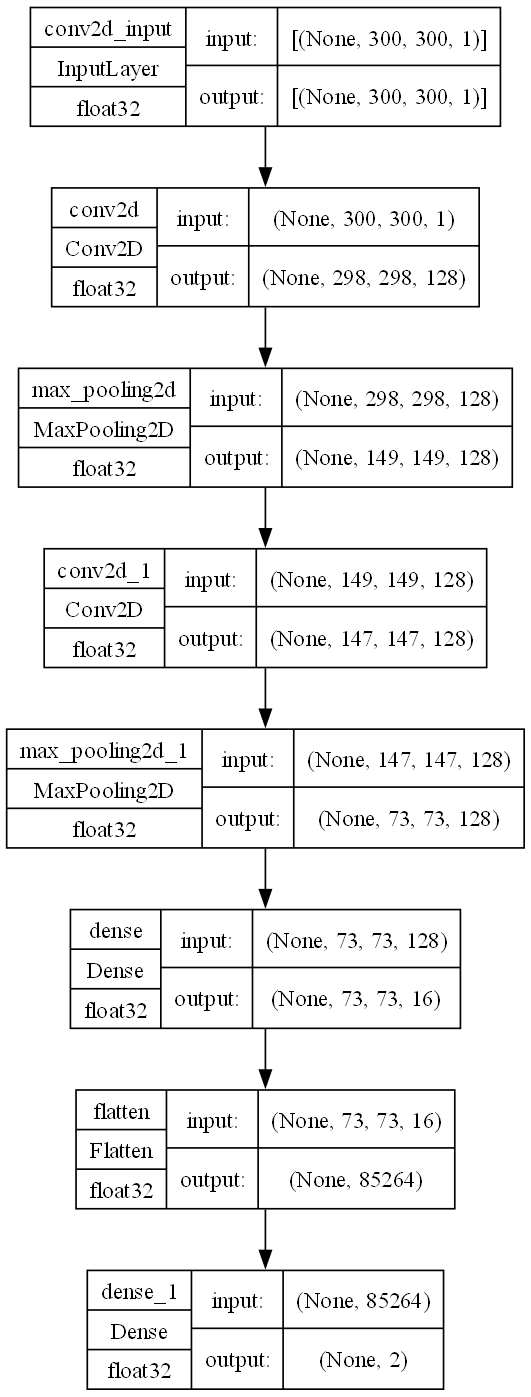

In [12]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [13]:
checkpoint_cb =ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=5, restore_best_weights=True)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy',keras.metrics.SpecificityAtSensitivity(0.5),keras.metrics.AUC()])
hist=model.fit(train_data,y_train,epochs=10,batch_size=32,validation_data=(test_data,y_test),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/10
66/66 [==============================] - ETA: 0s - loss: 0.8350 - accuracy: 0.6008 - specificity_at_sensitivity: 0.6903 - auc: 0.6144

d:\Project\anc_prog\anc_fol\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


66/66 [==============================] - 449s 7s/step - loss: 0.8350 - accuracy: 0.6008 - specificity_at_sensitivity: 0.6903 - auc: 0.6144 - val_loss: 0.5706 - val_accuracy: 0.5886 - val_specificity_at_sensitivity: 0.9733 - val_auc: 0.8182
Epoch 2/10
66/66 [==============================] - 440s 7s/step - loss: 0.2522 - accuracy: 0.9033 - specificity_at_sensitivity: 0.9948 - auc: 0.9699 - val_loss: 0.0476 - val_accuracy: 0.9981 - val_specificity_at_sensitivity: 1.0000 - val_auc: 0.9999
Epoch 3/10
66/66 [==============================] - 437s 7s/step - loss: 0.0645 - accuracy: 0.9819 - specificity_at_sensitivity: 0.9990 - auc: 0.9963 - val_loss: 0.0187 - val_accuracy: 0.9962 - val_specificity_at_sensitivity: 1.0000 - val_auc: 0.9999
Epoch 4/10
66/66 [==============================] - 435s 7s/step - loss: 0.0444 - accuracy: 0.9881 - specificity_at_sensitivity: 0.9990 - auc: 0.9977 - val_loss: 0.0155 - val_accuracy: 0.9962 - val_specificity_at_sensitivity: 1.0000 - val_auc: 0.9999
Epoch 5

<a id="6"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Evaluate The Model  </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [14]:
hist_=pd.DataFrame(hist.history)
hist_

loss  accuracy  specificity_at_sensitivity       auc  val_loss  \
0  0.834985  0.600762                    0.690329  0.614439  0.570600   
1  0.252151  0.903287                    0.994759  0.969944  0.047607   
2  0.064452  0.981896                    0.999047  0.996251  0.018715   
3  0.044380  0.988090                    0.999047  0.997691  0.015478   
4  0.010102  0.997618                    1.000000  0.999954  0.013447   
5  0.008393  0.998094                    1.000000  0.999981  0.009433   
6  0.051595  0.984755                    0.999524  0.998003  0.012685   
7  0.053987  0.986184                    0.998094  0.996408  0.033547   
8  0.007649  0.998571                    1.000000  0.999978  0.006141   
9  0.004105  0.999047                    1.000000  0.999998  0.007006   

   val_accuracy  val_specificity_at_sensitivity   val_auc  
0      0.588571                        0.973333  0.818210  
1      0.998095                        1.000000  0.999946  
2      0.996190                        1.000000  0.999938  
3      0.996190                        1.000000  0.999942  
4      0.998095                        1.000000  0.999996  
5      0.998095                        1.000000  0.999946  
6      0.996190                        1.000000  0.999971  
7      0.990476                        1.000000  0.999423  
8      0.998095                        1.000000  0.999996  
9      0.998095                        1.000000  0.999975

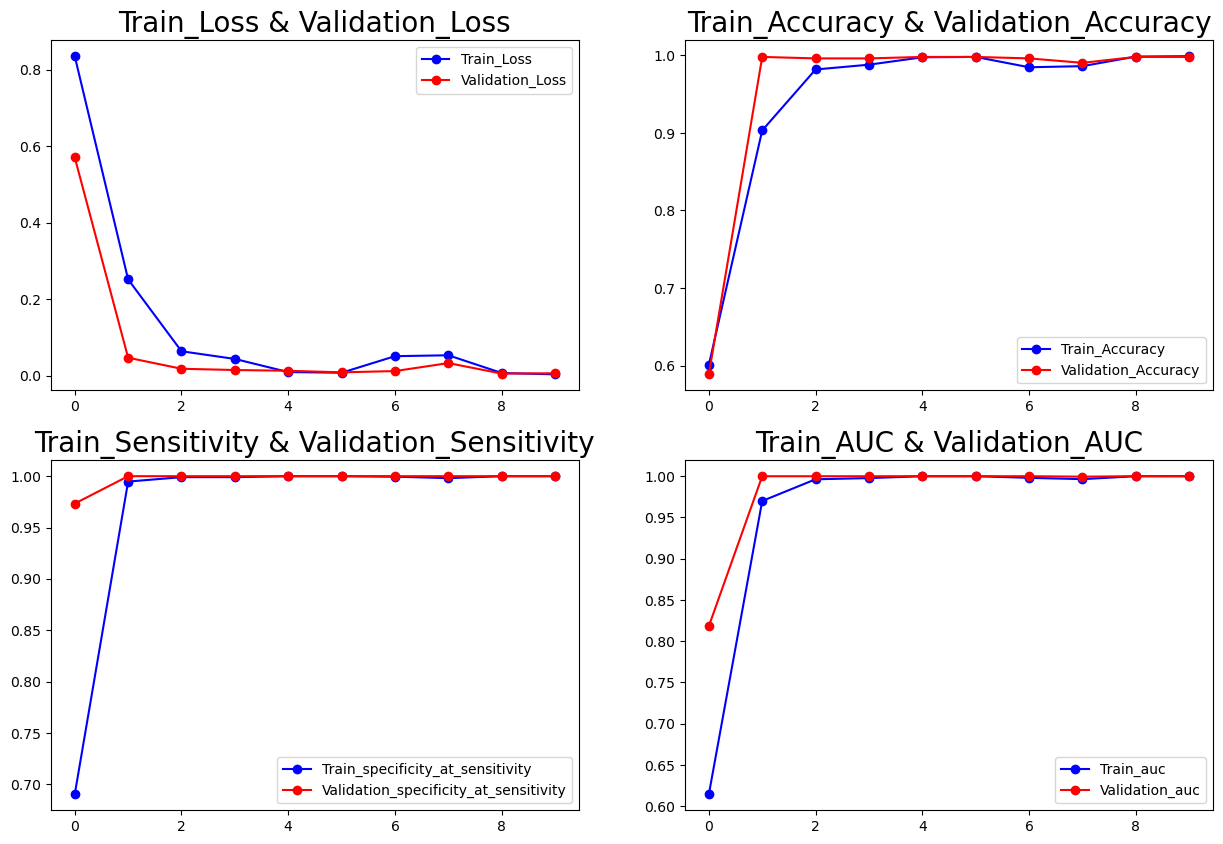

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(hist_['loss'],'b-o',label='Train_Loss')
plt.plot(hist_['val_loss'],'r-o',label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(2,2,2)
plt.plot(hist_['accuracy'],'b-o',label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],'r-o',label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.subplot(2,2,3)
plt.plot(hist_['specificity_at_sensitivity'],'b-o',label='Train_specificity_at_sensitivity')
plt.plot(hist_['val_specificity_at_sensitivity'],'r-o',label='Validation_specificity_at_sensitivity')
plt.title('Train_Sensitivity & Validation_Sensitivity',fontsize=20)
plt.legend()
plt.subplot(2,2,4)
plt.plot(hist_['auc'],'b-o',label='Train_auc')
plt.plot(hist_['val_auc'],'r-o',label='Validation_auc')
plt.title('Train_AUC & Validation_AUC',fontsize=20)
plt.legend()
plt.show()

In [16]:
score, acc,sensitivity,auc = model.evaluate(test_data,y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)
print('Test Sensitivity =', sensitivity)
print('Test AUC =', auc)

17/17 [==============================] - 27s 2s/step - loss: 0.0070 - accuracy: 0.9981 - specificity_at_sensitivity: 1.0000 - auc: 1.0000
Test Loss = 0.007005747873336077
Test Accuracy = 0.9980952143669128
Test Sensitivity = 1.0
Test AUC = 0.9999746084213257


In [10]:
predictions = model.predict(test_data)
y_pred=np.argmax(predictions, axis=1)
y_test_=np.argmax(y_test, axis=1)
df = pd.DataFrame({'Actual': y_test_, 'Prediction': y_pred})
df

17/17 [==============================] - 31s 2s/step


Actual  Prediction
0         1           1
1         1           1
2         0           0
3         0           0
4         1           1
..      ...         ...
520       1           1
521       0           0
522       1           1
523       0           0
524       0           0

[525 rows x 2 columns]

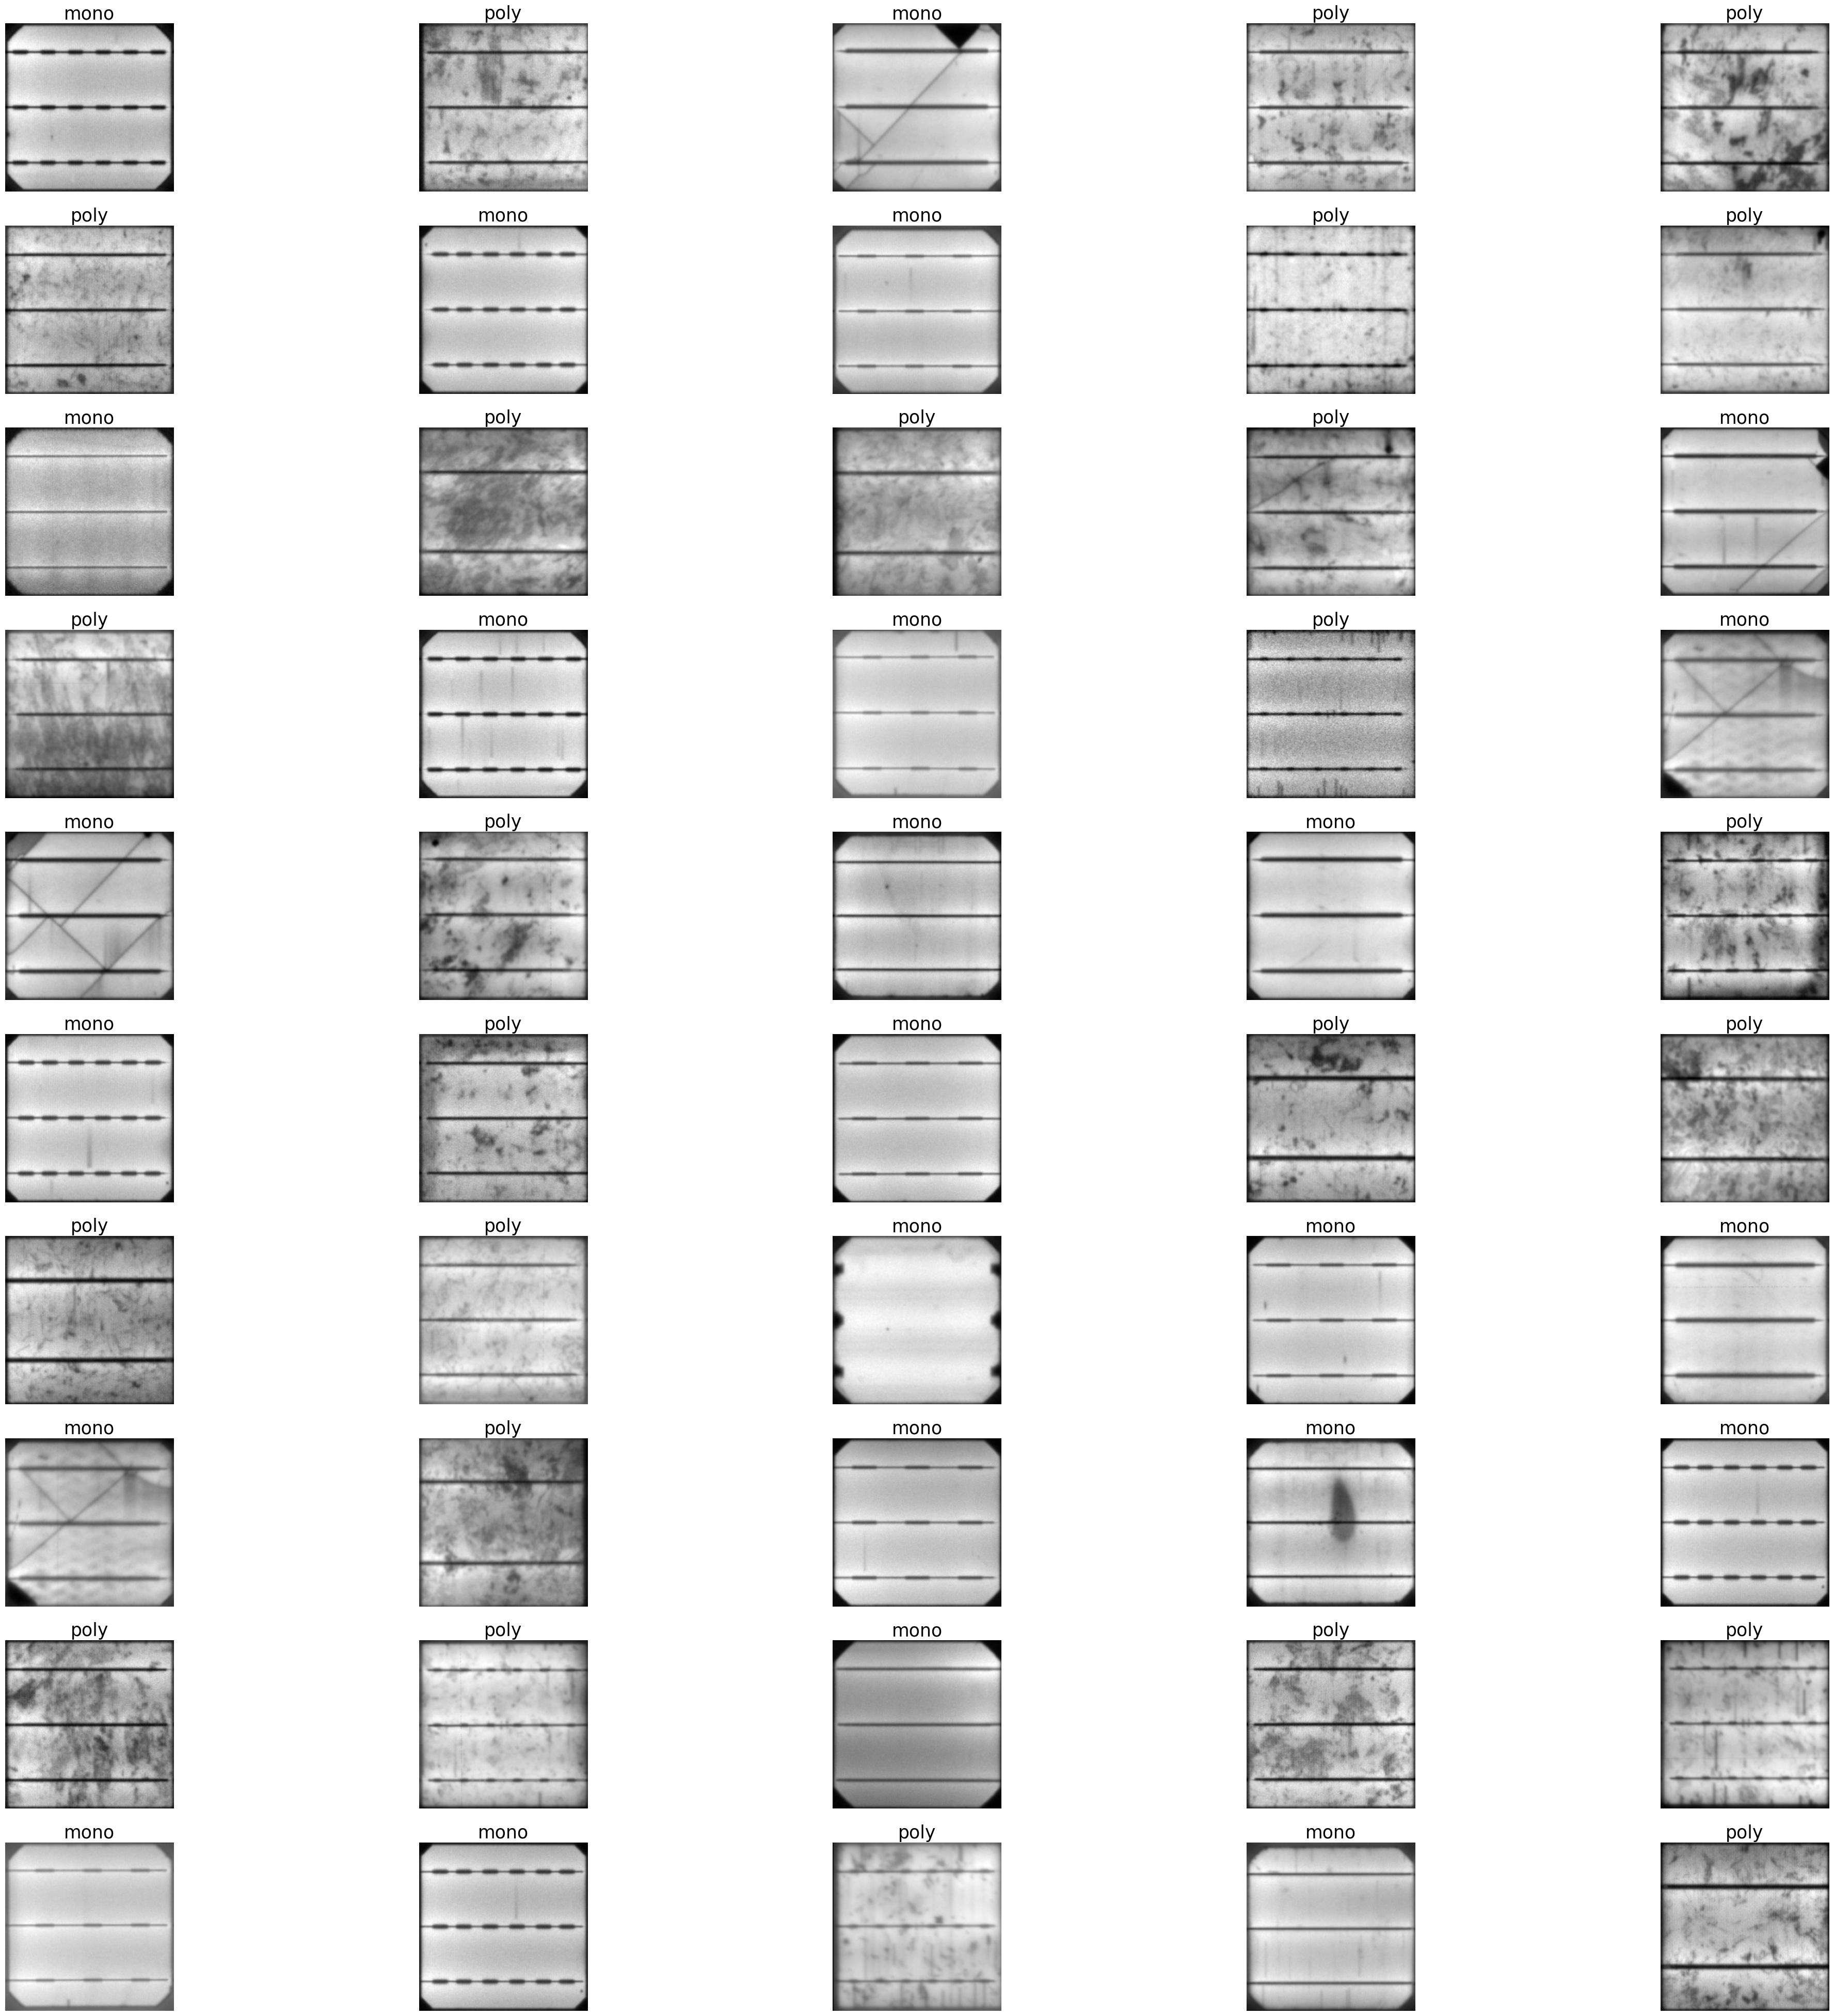

In [18]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(test_data),50)):
    plt.subplot(10,5,n+1)
    plt.imshow(test_data[i],'gray')
    plt.axis('off')
    plt.title(class_names[y_pred[i]],fontsize=25)

array([[216,   0],
       [  1, 308]], dtype=int64)

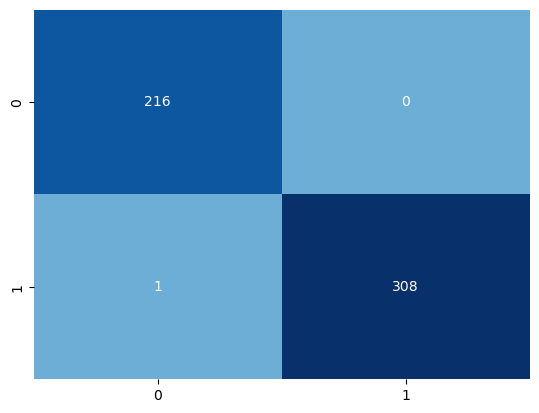

In [11]:
CM = confusion_matrix(y_test_,y_pred)
sns.heatmap(CM,fmt='g',center = True,cbar=False,annot=True,cmap='Blues')
CM

In [15]:
ClassificationReport = classification_report(y_test_,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00       309

    accuracy                           1.00       525
   macro avg       1.00      1.00      1.00       525
weighted avg       1.00      1.00      1.00       525

